## Credit Card Fraud Detection 

In [23]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

np.random.seed(2)

In [24]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here the data seems to be only numbers, because we can not have a origincal datas with the credit card information.

In [25]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop('Amount', axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [26]:
#drop time column as it is not contibuting in predicting the fraudalent transaction
data = data.drop('Time', axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [27]:
#Define X and y for the model input
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [28]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [29]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [30]:
#split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
X_train.shape

(199364, 29)

In [32]:
X_test.shape

(85443, 29)

In [33]:
#convert the data into array for input
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [34]:
#import required libraries to add layers in the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [35]:
classifier = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(1, activation='sigmoid')    
])

In [36]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Training the model


In [37]:
#compile and train the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 11s 56us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 11s 54us/step - loss: 0.0041 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 11s 54us/step - loss: 0.0037 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 11s 54us/step - loss: 0.0036 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 11s 54us/step - loss: 0.0034 - acc: 0.9994


In [38]:
#predict the results
y_pred = classifier.predict(X_test)

array([[85277,    19],
       [   28,   119]], dtype=int64)

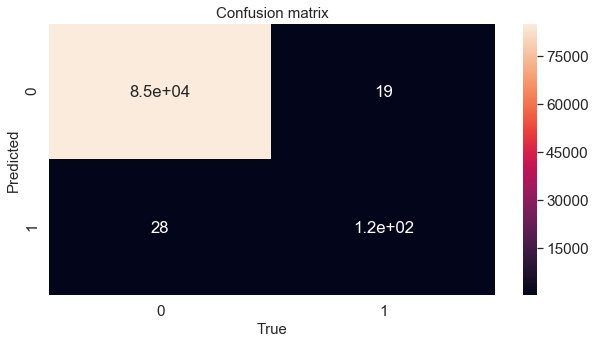

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('True', fontsize=15)
plt.title('Confusion matrix', fontsize=15)
cm

**Here (22+116) users fooled the company by stealing through fraudulent transaction.**

array([[284247,     68],
       [    87,    405]], dtype=int64)

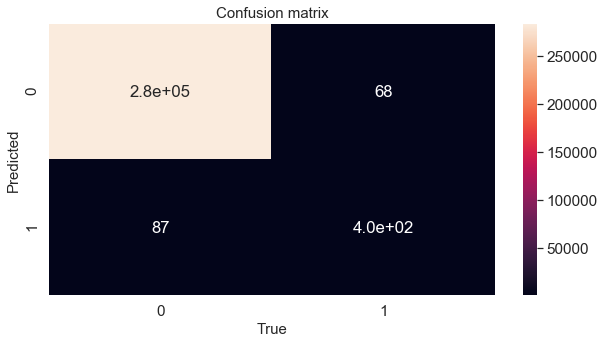

In [40]:
#calculate the results for all the data 
y_pred_all = classifier.predict(X)
cm_all = confusion_matrix(y, y_pred_all.round())
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_all, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('True', fontsize=15)
plt.title('Confusion matrix', fontsize=15)
cm_all

**Here overall (60+380) users fooled the company by stealing through fraudulent transaction.**

In [41]:
#evaluate the model for testing dataset
score = classifier.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 11us/step


In [42]:
#display the accuracy of the model on training dataset
print('Accuracy: ', score[1])

Accuracy:  0.9994499256814484


In [43]:
#evaluate the model for all data
score = classifier.evaluate(X, y)

284807/284807 [==============================] - 3s 10us/step


In [44]:
#display the accuracy of the model on complete dataset
print('Accuracy: ', score[1])

Accuracy:  0.9994557718033615


## Undersampling

In [45]:
#fetch the indices of fraud and non-fraudulent transactions
fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = np.array(data[data.Class == 0].index)

In [46]:
#take a subset of non-fraudulent transactions (number of transactions equal to fraudulent transaction)
random_normal_indices = np.array(np.random.choice(normal_indices, len(fraud_indices), replace=False))

In [47]:
#merge all fraudulent and non-fraudulent transactions
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

In [48]:
#fetch all transactions based on the above index array
under_sample_data = data.iloc[under_sample_indices]

In [49]:
#create X and y for the model
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [50]:
#split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0)

In [51]:
#convert all the matrices into array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [52]:
#check the summary of the model
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [53]:
#compile and train the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
688/688 [==============================] - 0s 455us/step - loss: 0.7051 - acc: 0.9201
Epoch 2/5
688/688 [==============================] - 0s 54us/step - loss: 0.2775 - acc: 0.9317
Epoch 3/5
688/688 [==============================] - 0s 56us/step - loss: 0.1750 - acc: 0.9390
Epoch 4/5
688/688 [==============================] - 0s 55us/step - loss: 0.1651 - acc: 0.9375
Epoch 5/5
688/688 [==============================] - 0s 58us/step - loss: 0.1658 - acc: 0.9404


In [57]:
#predict the results for testing dataset
y_pred = classifier.predict(X_test)
y_expected = pd.DataFrame(y_test)

array([[149,   0],
       [ 16, 131]], dtype=int64)

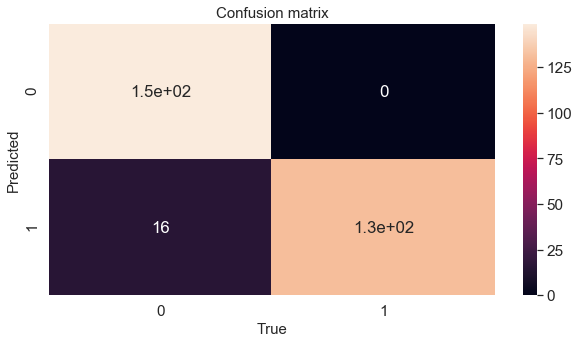

In [59]:
#confusion matrix
cm = confusion_matrix(y_expected, y_pred.round())
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('True', fontsize=15)
plt.title('Confusion matrix', fontsize=15)
cm

array([[283885,    430],
       [    57,    435]], dtype=int64)

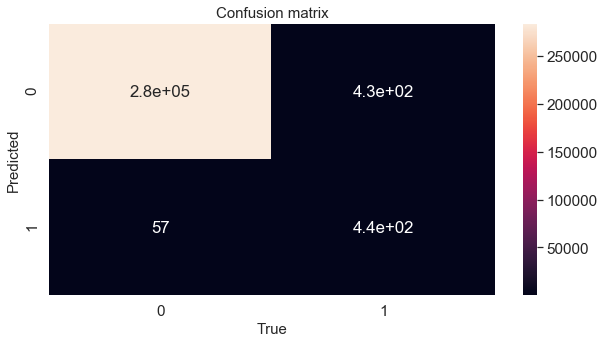

In [60]:
#predict the resuts for all the rows
y_pred = classifier.predict(X)
y_expected = pd.DataFrame(y)

cm = confusion_matrix(y_expected, y_pred.round())
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('True', fontsize=15)
plt.title('Confusion matrix', fontsize=15)
cm